In [1]:
from RL_cliff.environment import *
from RL_cliff.learning_algorithm import *
import pickle

In [2]:
train = False
load = not train

In [3]:
if train:
    env = Cliff()
    num_avg = 10
    stats = {"SCRN": {}, "SPG": {}}
    for i in range(num_avg):
        np.random.seed = i
        print(f"========== TRAINING RUN {i} OUT OF {num_avg} ===========")
        print("********** TRAINING WITH SCRN **********")
        stats_SCRN = discrete_SCRN(env, num_episodes=3000)
        stats["SCRN"].update({i: stats_SCRN})
        print("********** TRAINING WITH SPG ********")
        stats_DPG = discrete_policy_gradient(env, num_episodes=3000)
        stats["SPG"].update({i: stats_DPG})
    average_stats = {"SCRN": {}, "SPG": {}}
    average_stats["SCRN"] = {key: np.median([stats["SCRN"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]}
    average_stats["SPG"] = {key: np.median([stats["SPG"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]} 
    with open("results.pkl", "wb") as handle:
        pickle.dump(average_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("results.pkl", "rb") as f:
        average_stats = pickle.load(f)

In [4]:
show_SCRN = True
show_SPG = True

<Figure size 640x480 with 0 Axes>

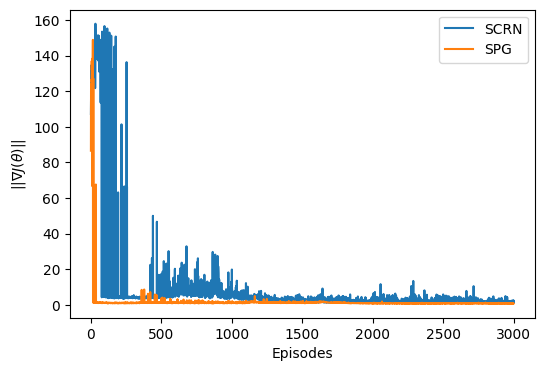

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.figure(figsize=(6, 4))
if show_SCRN:
    plt.plot(average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["gradients"], label="SPG")
plt.ylabel(r"$\vert \vert \nabla J(\theta) \vert \vert$")
plt.xlabel("Episodes")
plt.legend(loc="best")
plt.show()

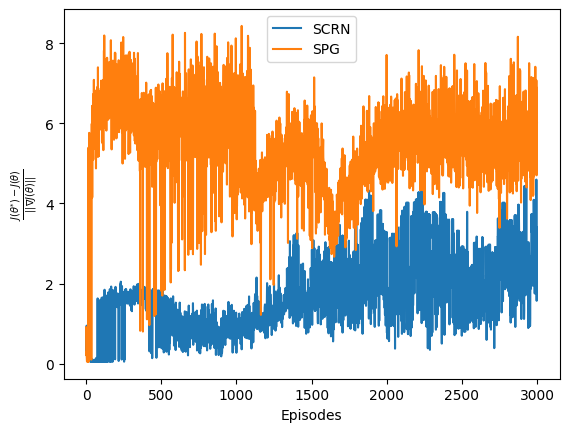

In [6]:
plt.figure()
if show_SCRN:
    plt.plot((average_stats["SCRN"]["optimum"]-average_stats["SCRN"]["objectives"])/average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot((average_stats["SPG"]["optimum"]-average_stats["SPG"]["objectives"])/average_stats["SPG"]["gradients"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$")
plt.show()

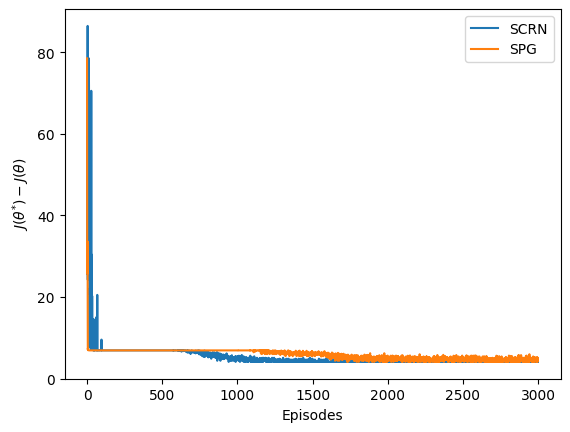

In [7]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["optimum"] - average_stats["SCRN"]["objectives"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["optimum"] - average_stats["SPG"]["objectives"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$J(\theta^{*}) - J(\theta)$")
plt.show()

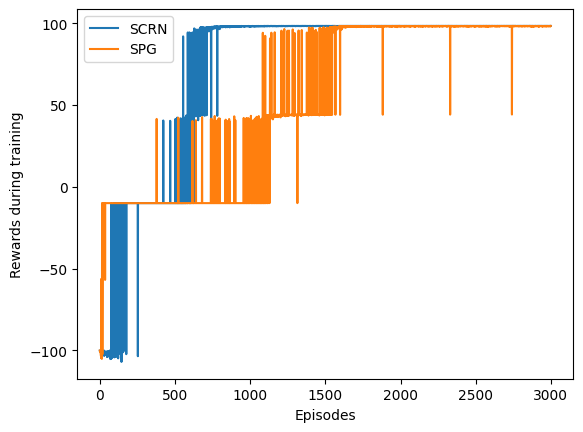

In [8]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["rewards"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["rewards"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel("Rewards during training")
plt.show()

In [9]:
def compare_probabilities_learned(average_stats, state, save_link=None):
    """
    Compare probabilities learned during training
    """

    fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(8, 4))
    plt.tight_layout()
    fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
    
    fig.suptitle(f"Probabilities for state {state}")
    
    length = average_stats["SPG"]["history_probs"].shape[0]
    
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 0] for j in range(length)], label="SPG - P(up)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 1] for j in range(length)], label="SPG - P(down)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 0] for j in range(length)], label="SCRN - P(up)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 1] for j in range(length)], label="SCRN - P(down)")

    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 2] for j in range(length)], label="SPG - P(left)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 3] for j in range(length)], label="SPG - P(right)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 2] for j in range(length)], label="SCRN - P(left)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 3] for j in range(length)], label="SCRN - P(right)")

    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

    ax[0].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[0].set_xlabel("Episode", fontsize=20)

    ax[1].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[1].set_xlabel("Episode", fontsize=20)

    ax[0].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[0].set_xticks(np.linspace(0, length, 6), fontsize=15)
    ax[1].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[1].set_xticks(np.linspace(0, length, 6), fontsize=15)
    
    plt.savefig(save_link)
    plt.show()
    
    return fig, ax

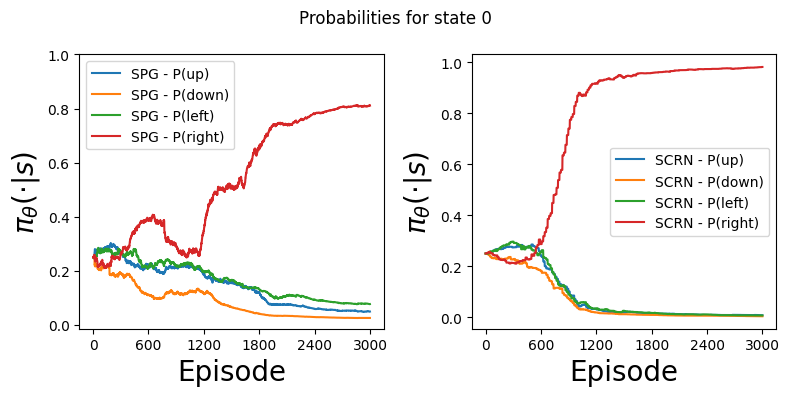

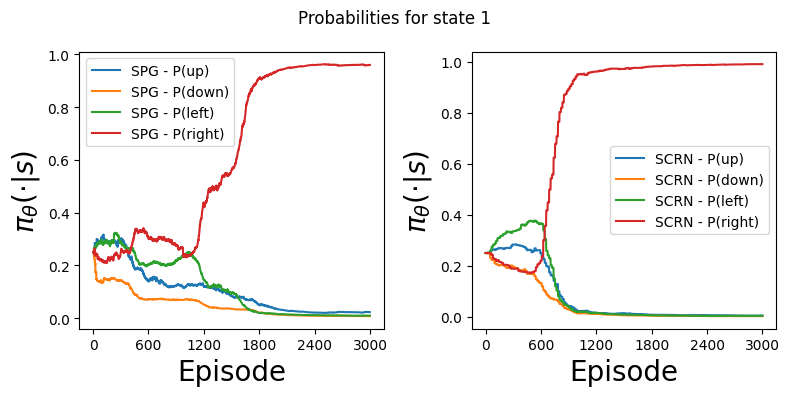

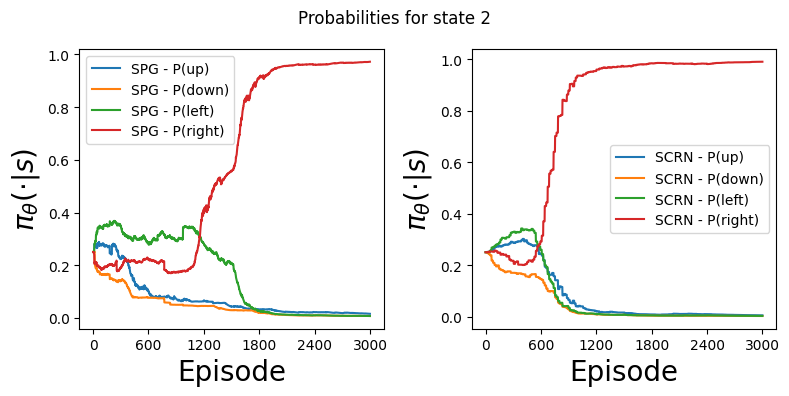

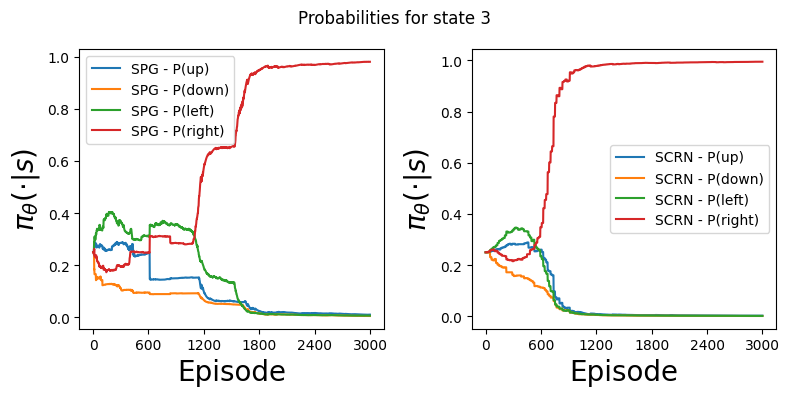

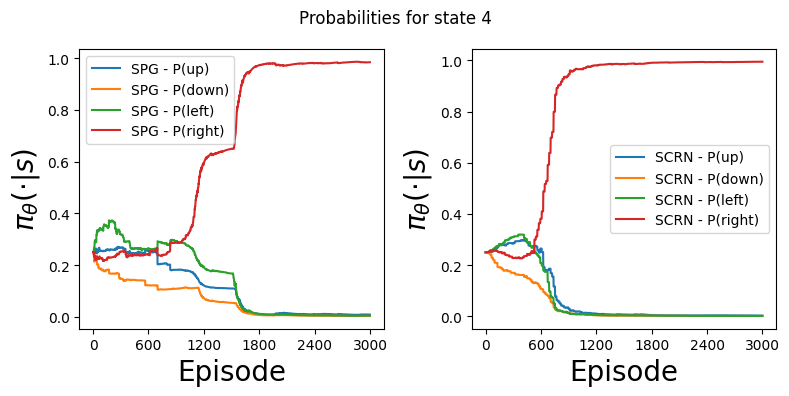

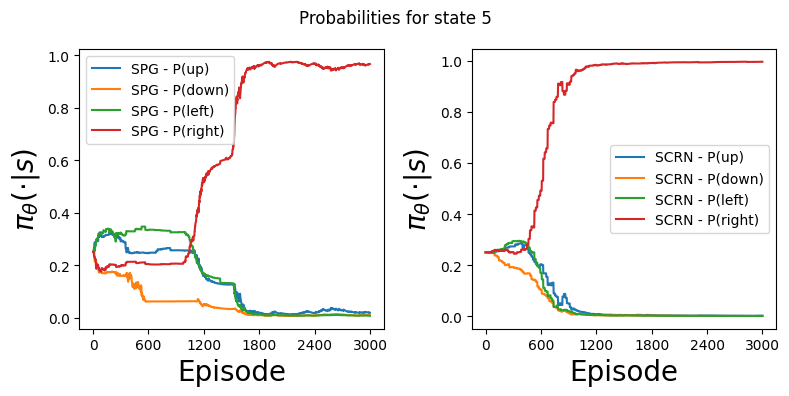

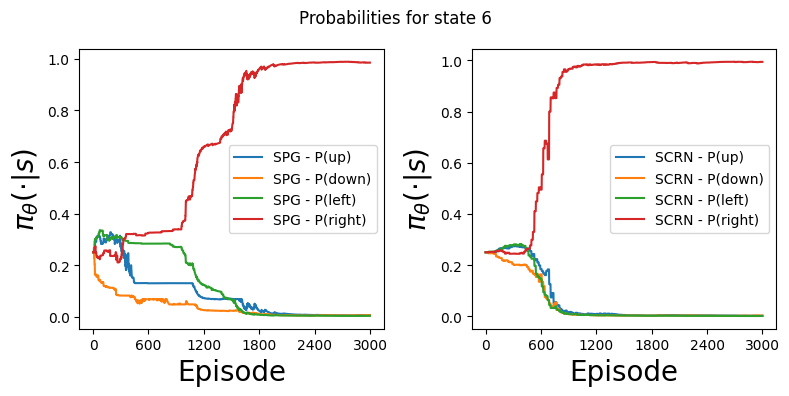

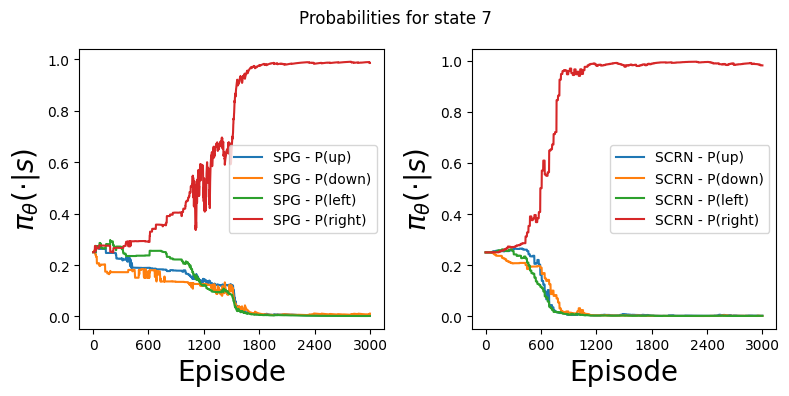

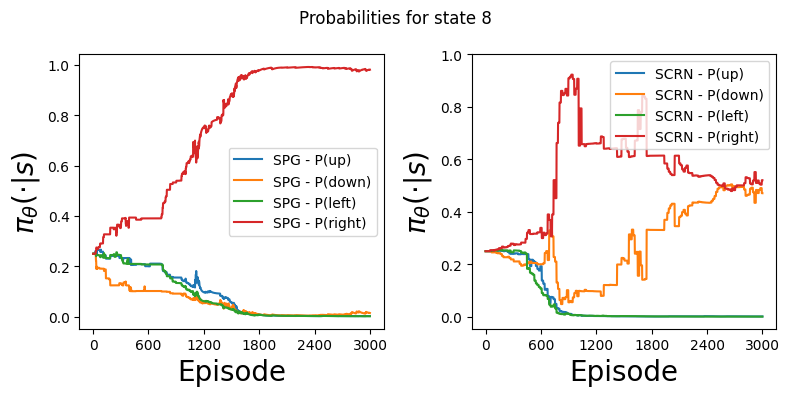

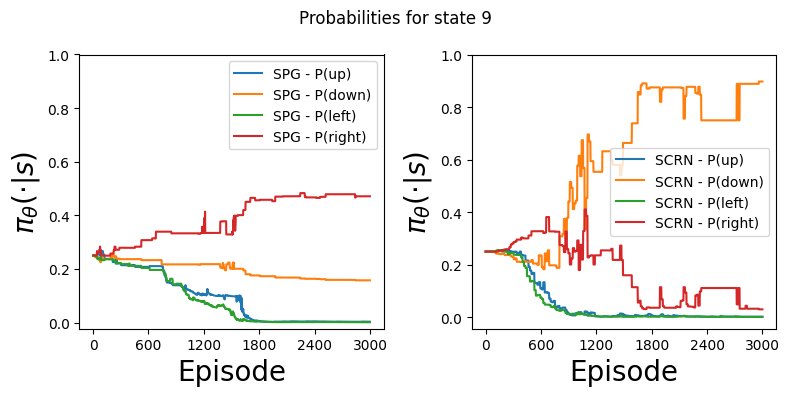

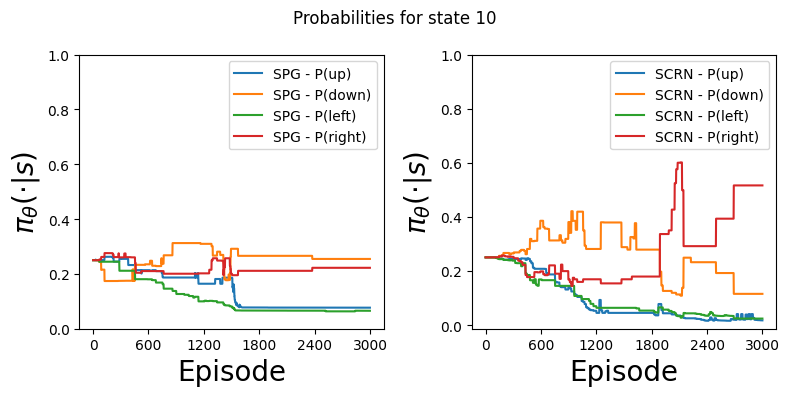

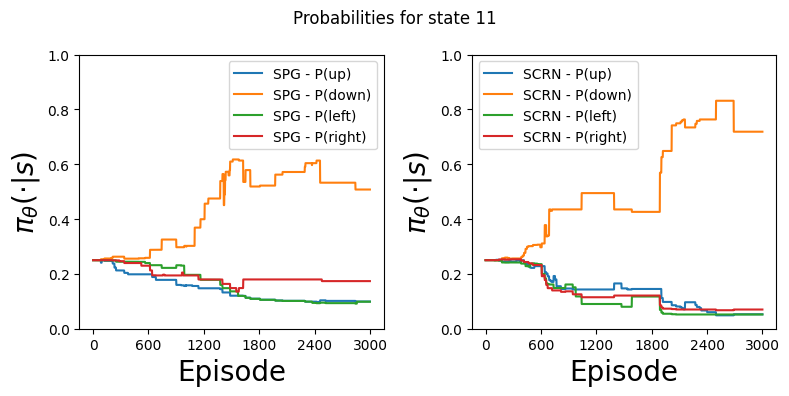

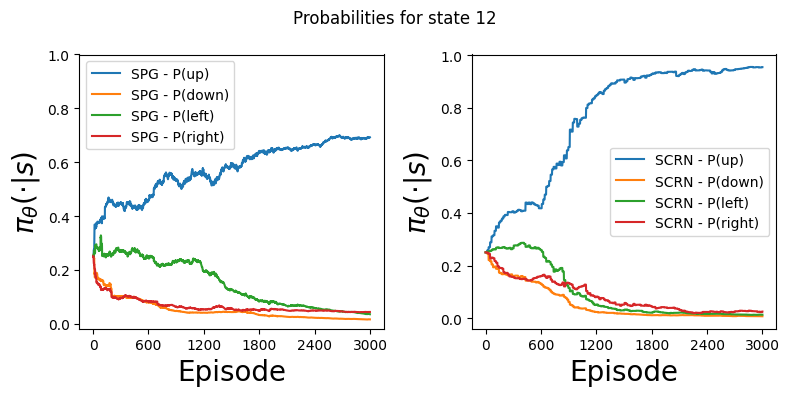

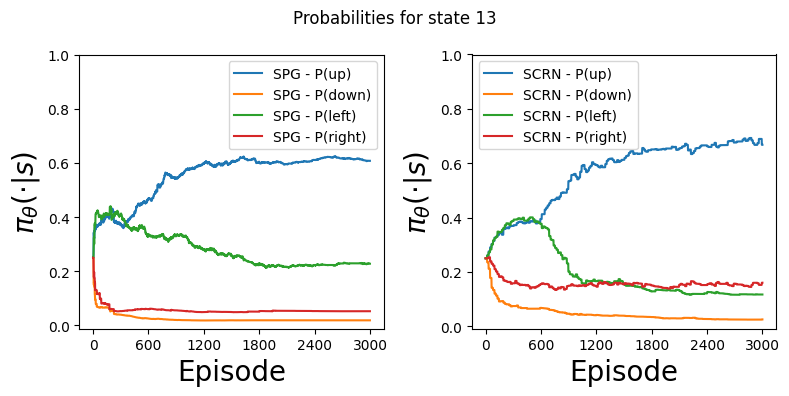

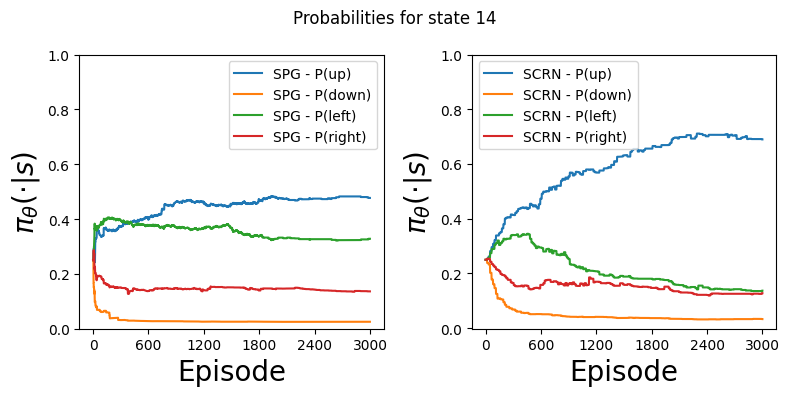

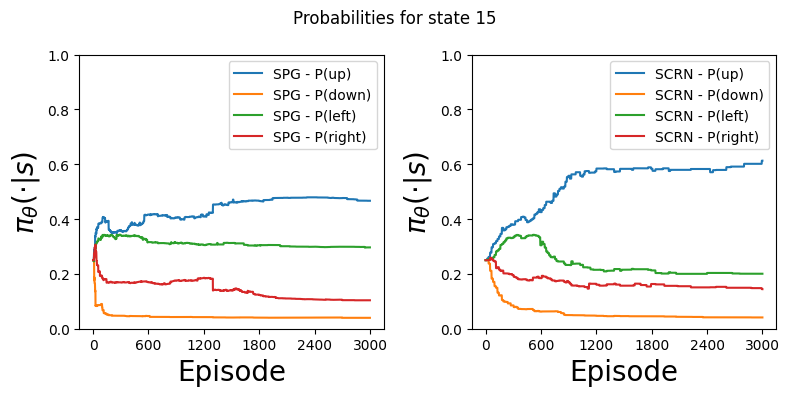

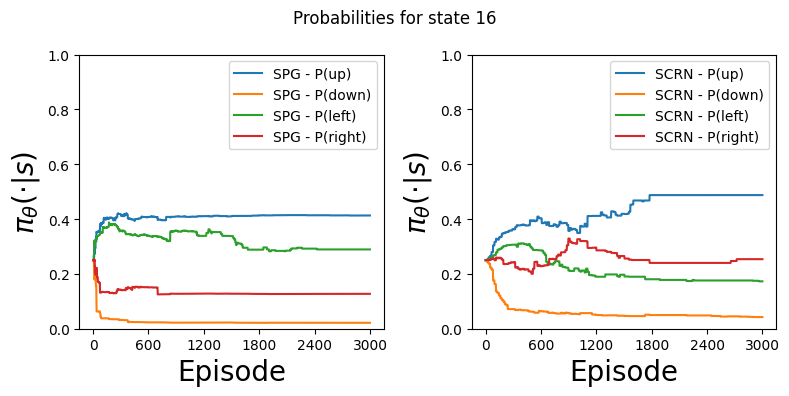

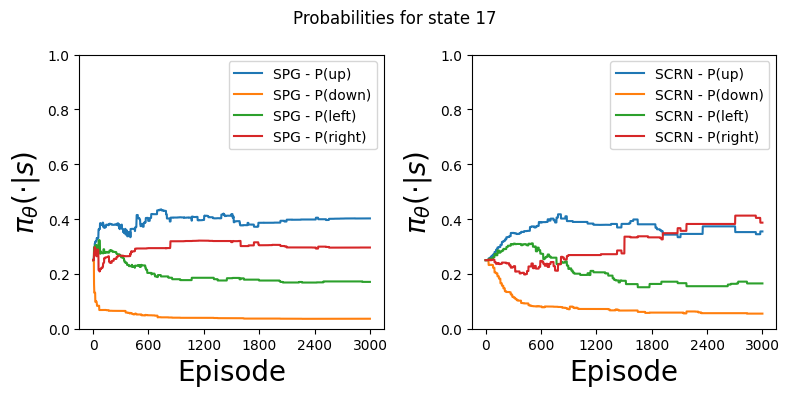

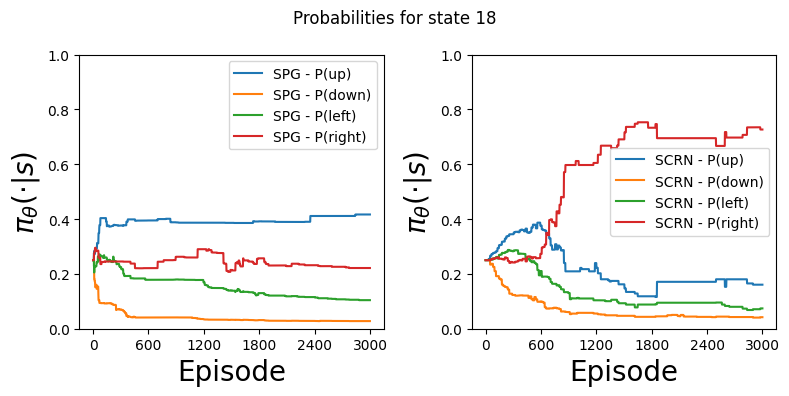

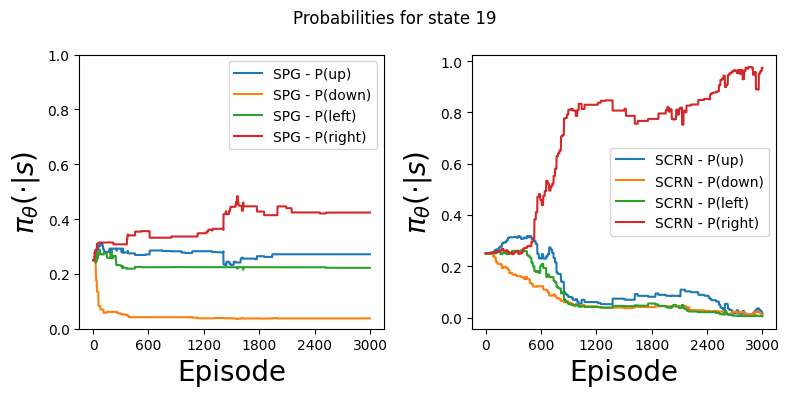

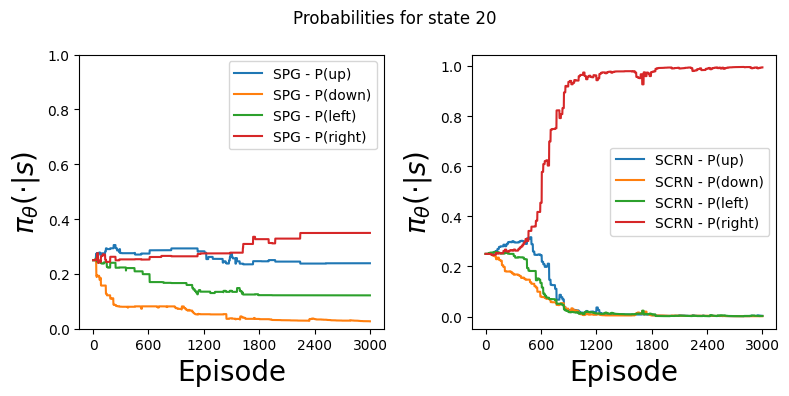

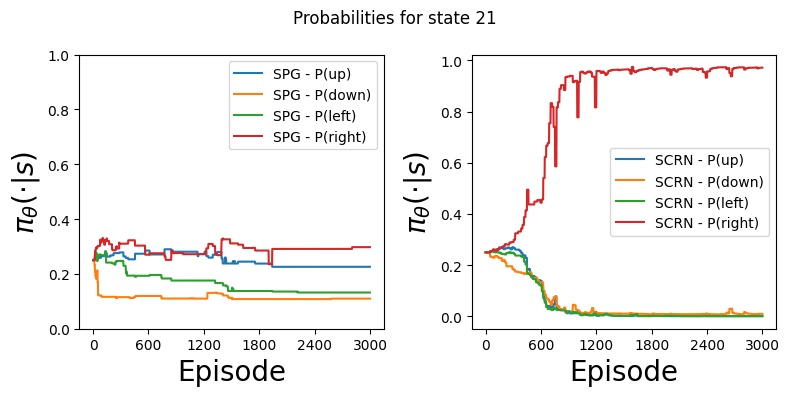

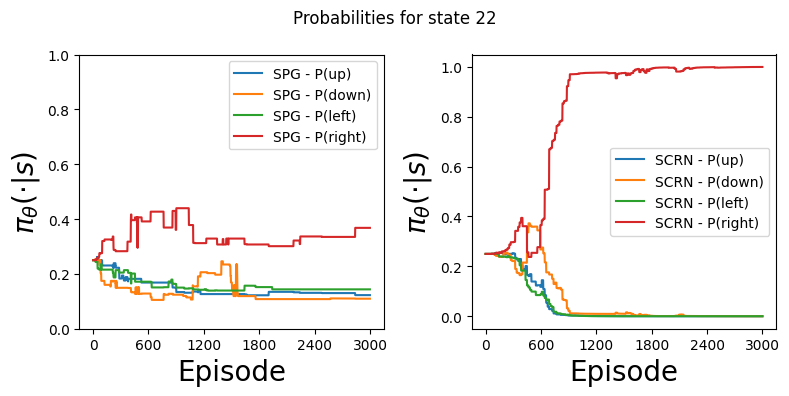

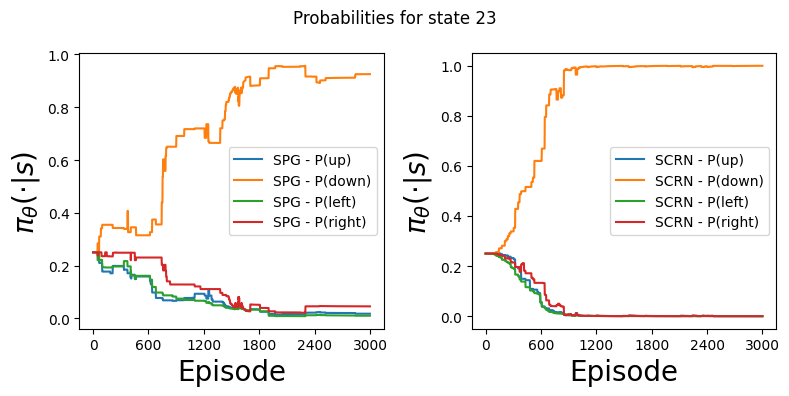

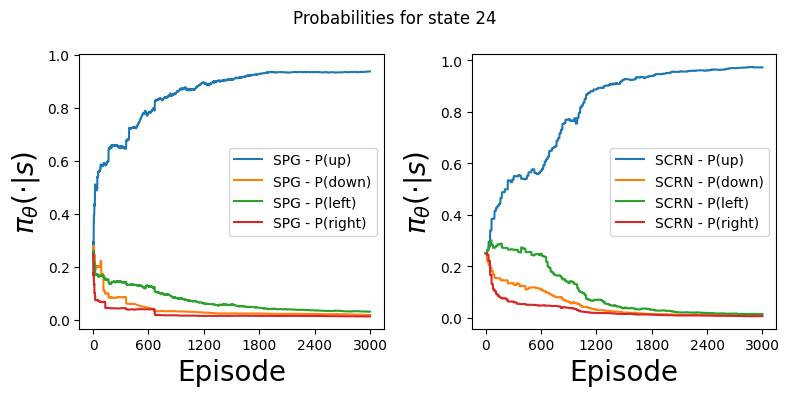

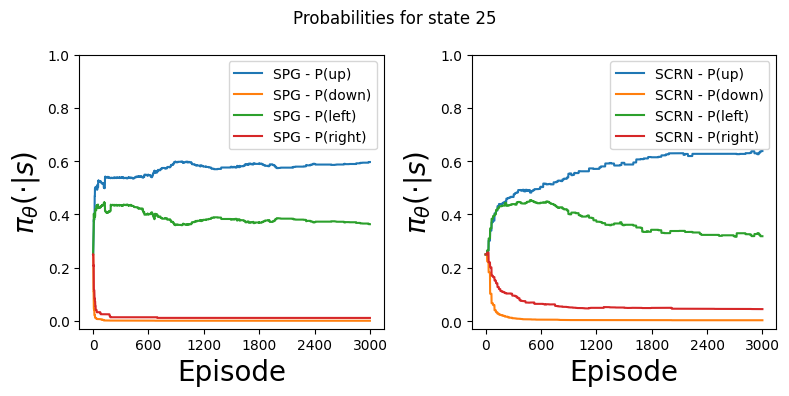

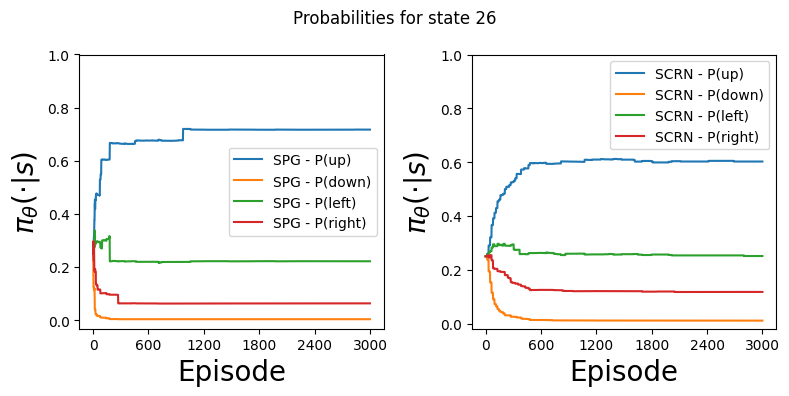

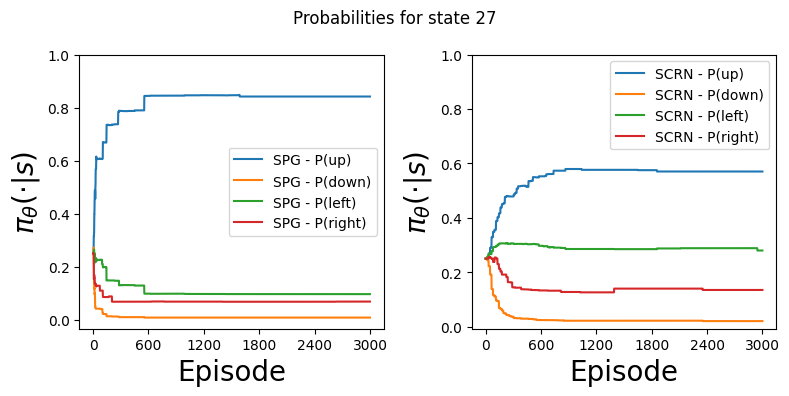

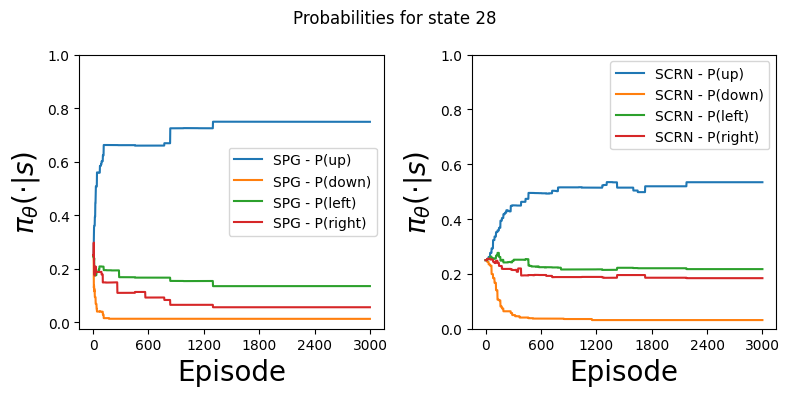

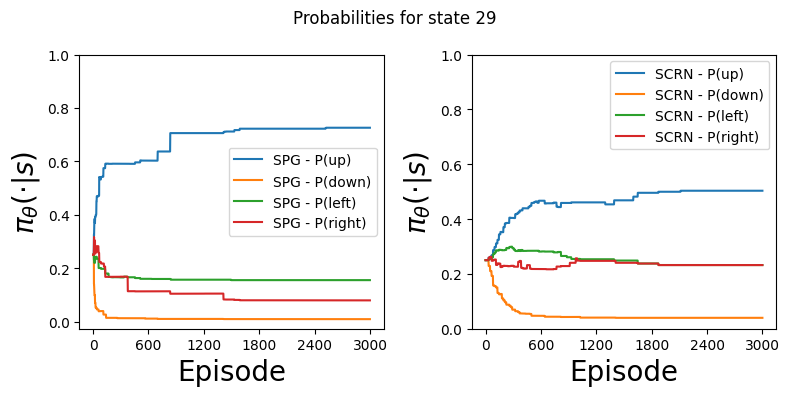

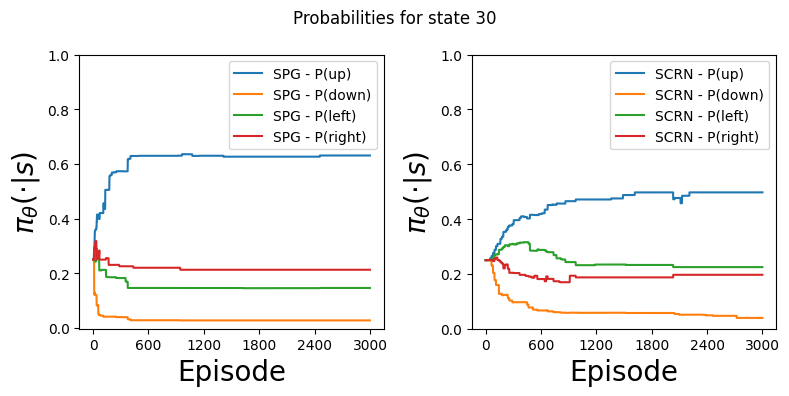

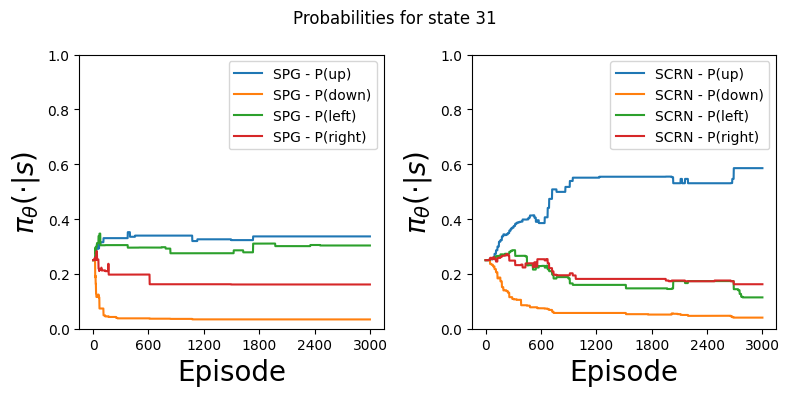

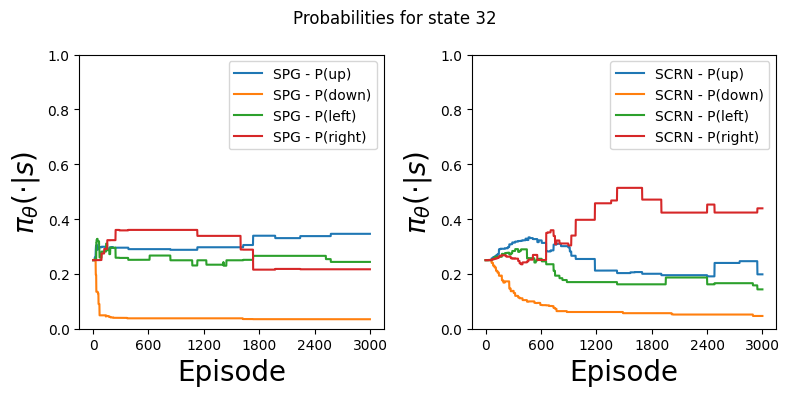

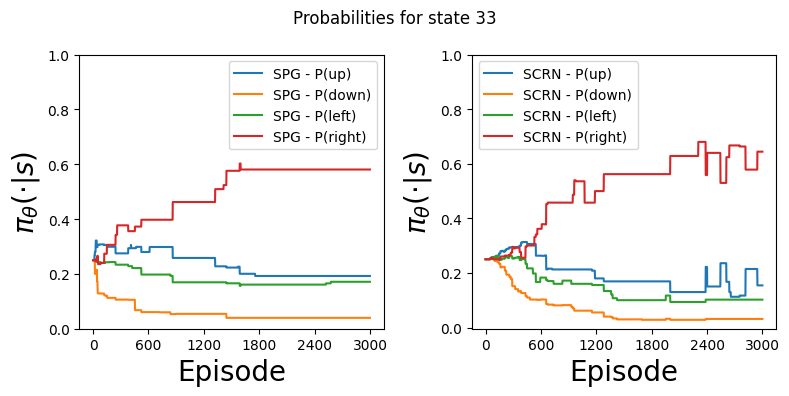

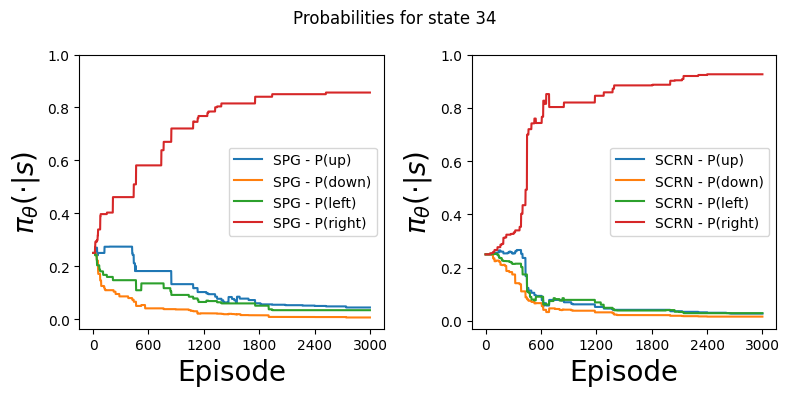

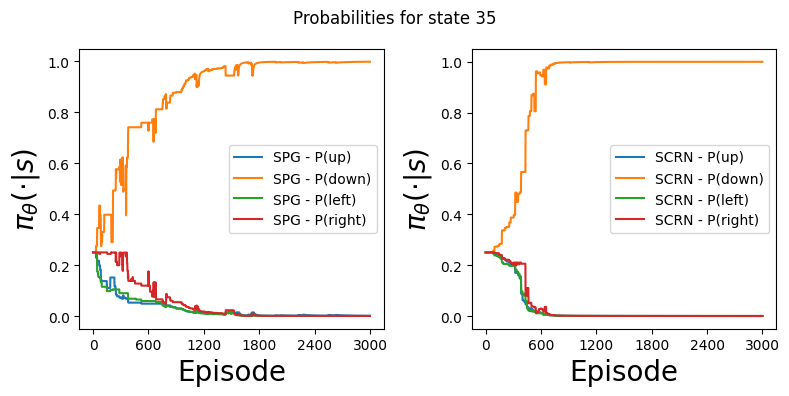

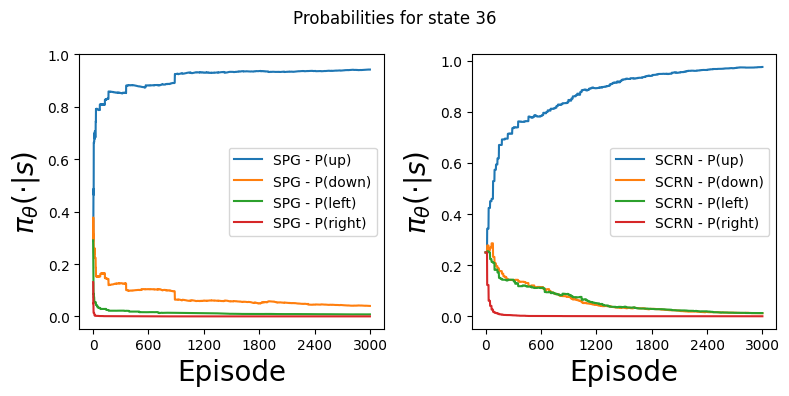

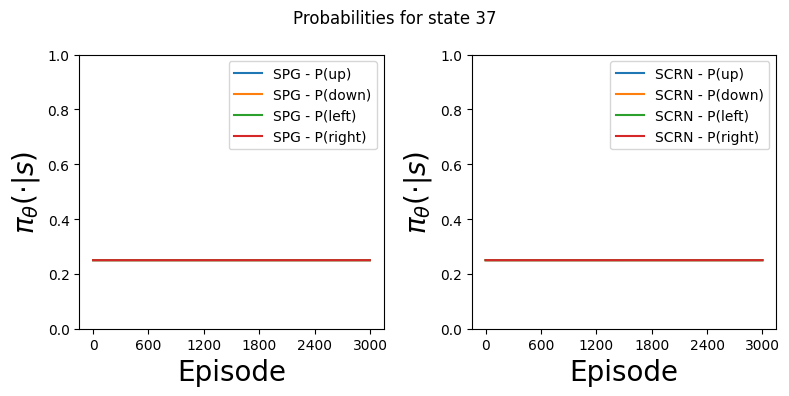

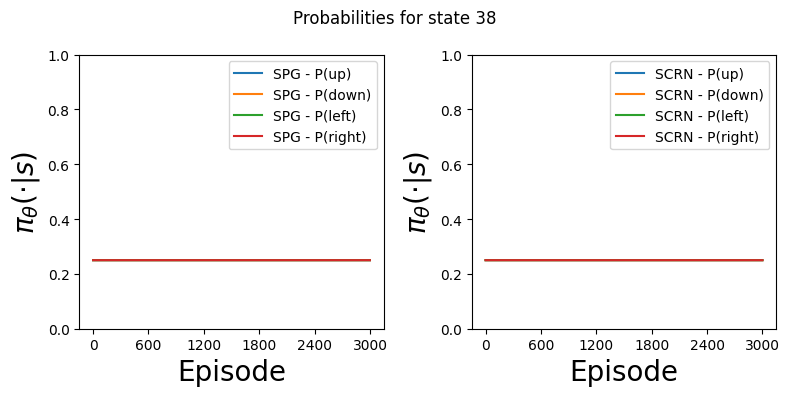

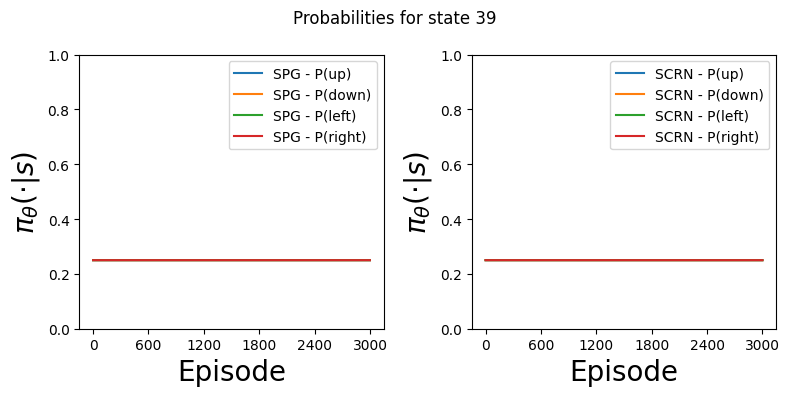

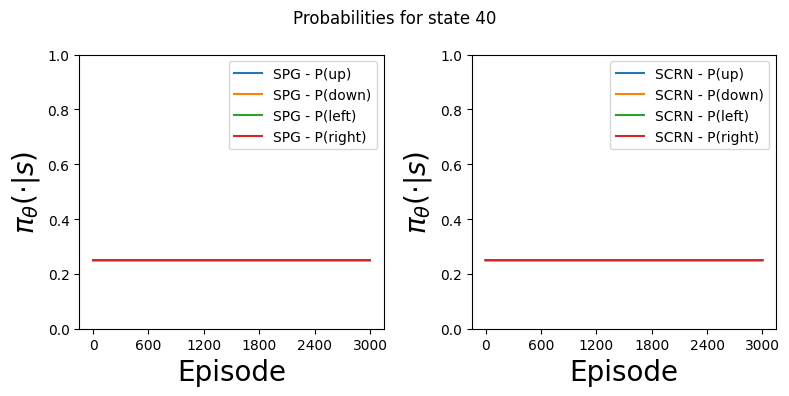

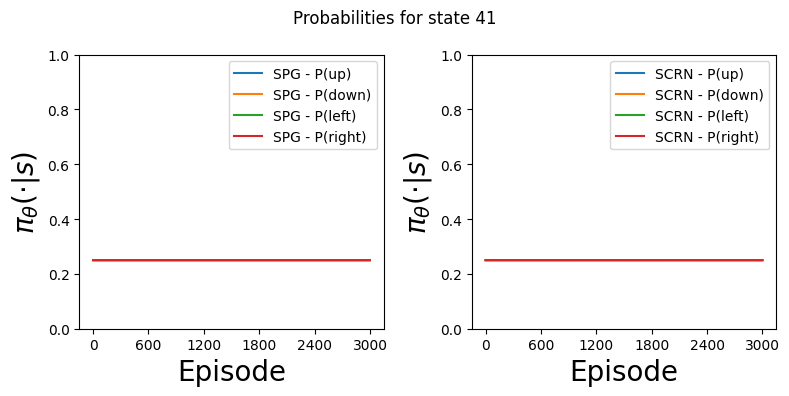

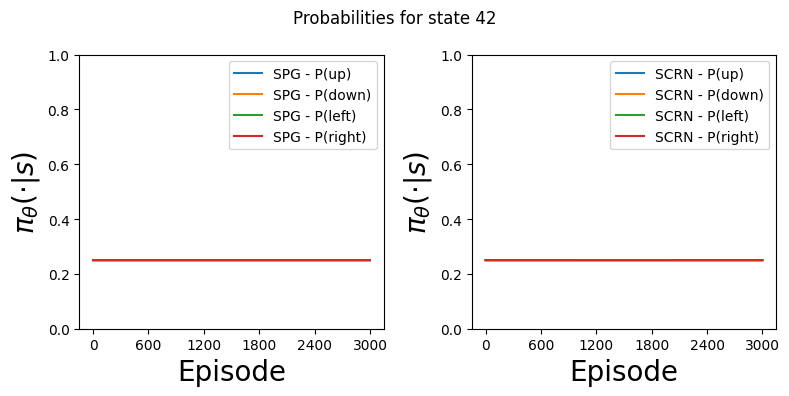

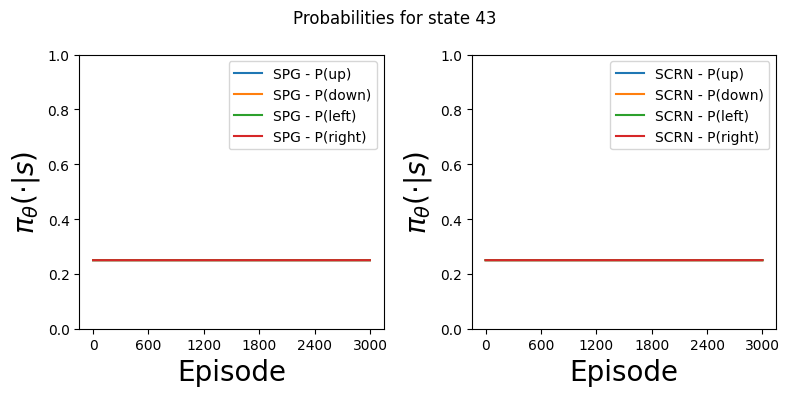

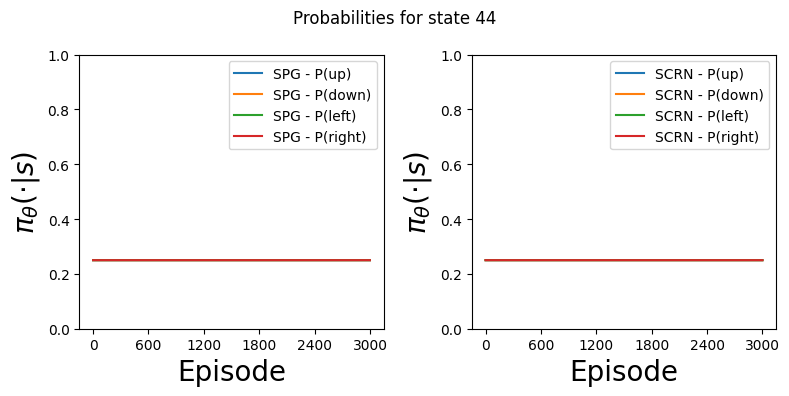

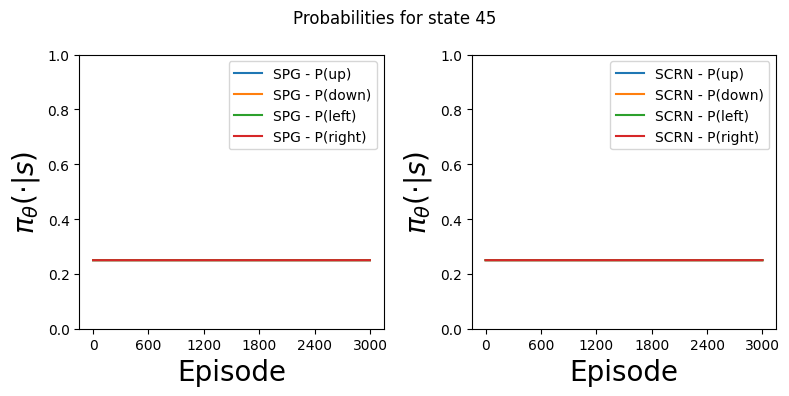

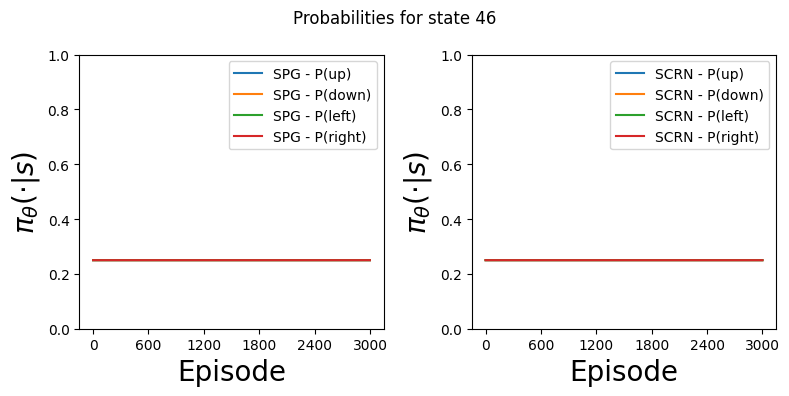

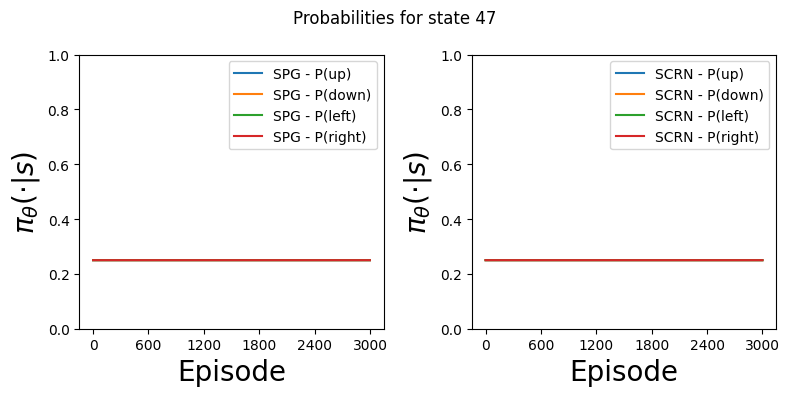

In [10]:
for j in range(48):
    compare_probabilities_learned(average_stats, j, f"figures/comparison/probabilities_{j}.png")

In [15]:
env = Cliff()
stats = discrete_SCRN(env, num_episodes=3000)

C:\Users\Federico Betti\Documents\GitHub\Global-Convergence-in-RL\RL_cliff\learning_algorithm.py:312: ComplexWarning: Casting complex values to real discards the imaginary part
  Hessians[episode] = np.linalg.eig(Hessian_traj)[0]


1 :  32.0
2 :  10.0
3 :  7.0
4 :  17.0
5 :  1.0
6 :  19.0
7 :  7.0
8 :  3.0
9 :  13.0
10 :  28.0
11 :  5.0
12 :  3.0
13 :  13.0
14 :  2.0
15 :  21.0
16 :  2.0
17 :  1.0
18 :  7.0
19 :  59.0
20 :  25.0
21 :  7.0
22 :  17.0
23 :  8.0
24 :  6.0
25 :  34.0
26 :  9.0
27 :  32.0
28 :  10.0
29 :  6.0
30 :  3.0
31 :  12.0
32 :  1.0
33 :  7.0
34 :  35.0
35 :  53.0
36 :  14.0
37 :  80.0
38 :  12.0
39 :  2.0
40 :  37.0
41 :  100.0
42 :  61.0
43 :  50.0
44 :  42.0
45 :  22.0
46 :  58.0
47 :  5.0
48 :  40.0
49 :  4.0
50 :  86.0
51 :  60.0
52 :  100.0
53 :  8.0
54 :  5.0
55 :  61.0
56 :  100.0
57 :  1.0
58 :  100.0
59 :  20.0
60 :  61.0
61 :  20.0
62 :  34.0
63 :  3.0
64 :  12.0
65 :  9.0
66 :  19.0
67 :  88.0
68 :  100.0
69 :  23.0
70 :  3.0
71 :  48.0
72 :  10.0
73 :  39.0
74 :  42.0
75 :  24.0
76 :  16.0
77 :  65.0
78 :  100.0
79 :  100.0
80 :  45.0
81 :  20.0
82 :  6.0
83 :  18.0
84 :  100.0
85 :  6.0
86 :  40.0
87 :  42.0
88 :  22.0
89 :  86.0
90 :  100.0
91 :  100.0
92 :  45.0
93 :  100.0
94 :

604 :  54.0
605 :  100.0
606 :  100.0
607 :  95.0
608 :  100.0
609 :  100.0
610 :  100.0
611 :  100.0
612 :  100.0
613 :  100.0
614 :  100.0
615 :  100.0
616 :  100.0
617 :  100.0
618 :  100.0
619 :  100.0
620 :  100.0
621 :  100.0
622 :  100.0
===== Goal reached in 57 steps =====
623 :  57.0
624 :  100.0
625 :  100.0
626 :  100.0
627 :  100.0
628 :  100.0
629 :  100.0
630 :  100.0
631 :  100.0
632 :  100.0
633 :  100.0
634 :  100.0
===== Goal reached in 37 steps =====
635 :  37.0
636 :  100.0
637 :  100.0
638 :  100.0
639 :  100.0
640 :  100.0
641 :  100.0
642 :  100.0
===== Goal reached in 69 steps =====
643 :  69.0
644 :  100.0
645 :  100.0
646 :  100.0
647 :  100.0
648 :  100.0
649 :  100.0
===== Goal reached in 58 steps =====
650 :  58.0
651 :  100.0
652 :  100.0
653 :  100.0
654 :  100.0
655 :  100.0
656 :  100.0
657 :  100.0
658 :  100.0
659 :  100.0
660 :  100.0
661 :  100.0
662 :  100.0
663 :  38.0
664 :  100.0
665 :  100.0
666 :  100.0
667 :  100.0
668 :  100.0
669 :  100.0
6

===== Goal reached in 21 steps =====
885 :  21.0
===== Goal reached in 19 steps =====
886 :  19.0
===== Goal reached in 32 steps =====
887 :  32.0
===== Goal reached in 23 steps =====
888 :  23.0
===== Goal reached in 18 steps =====
889 :  18.0
===== Goal reached in 22 steps =====
890 :  22.0
===== Goal reached in 21 steps =====
891 :  21.0
===== Goal reached in 21 steps =====
892 :  21.0
===== Goal reached in 31 steps =====
893 :  31.0
===== Goal reached in 19 steps =====
894 :  19.0
===== Goal reached in 22 steps =====
895 :  22.0
===== Goal reached in 20 steps =====
896 :  20.0
===== Goal reached in 25 steps =====
897 :  25.0
===== Goal reached in 24 steps =====
898 :  24.0
===== Goal reached in 42 steps =====
899 :  42.0
===== Goal reached in 24 steps =====
900 :  24.0
===== Goal reached in 27 steps =====
901 :  27.0
===== Goal reached in 21 steps =====
902 :  21.0
===== Goal reached in 21 steps =====
903 :  21.0
===== Goal reached in 20 steps =====
904 :  20.0
===== Goal reached i

===== Goal reached in 25 steps =====
1055 :  25.0
===== Goal reached in 17 steps =====
1056 :  17.0
===== Goal reached in 26 steps =====
1057 :  26.0
===== Goal reached in 17 steps =====
1058 :  17.0
===== Goal reached in 19 steps =====
1059 :  19.0
===== Goal reached in 23 steps =====
1060 :  23.0
===== Goal reached in 23 steps =====
1061 :  23.0
===== Goal reached in 21 steps =====
1062 :  21.0
===== Goal reached in 18 steps =====
1063 :  18.0
===== Goal reached in 20 steps =====
1064 :  20.0
===== Goal reached in 20 steps =====
1065 :  20.0
===== Goal reached in 18 steps =====
1066 :  18.0
===== Goal reached in 17 steps =====
1067 :  17.0
===== Goal reached in 18 steps =====
1068 :  18.0
===== Goal reached in 28 steps =====
1069 :  28.0
===== Goal reached in 17 steps =====
1070 :  17.0
===== Goal reached in 20 steps =====
1071 :  20.0
===== Goal reached in 19 steps =====
1072 :  19.0
===== Goal reached in 17 steps =====
1073 :  17.0
===== Goal reached in 19 steps =====
1074 :  19.0


1219 :  17.0
===== Goal reached in 17 steps =====
1220 :  17.0
===== Goal reached in 17 steps =====
1221 :  17.0
===== Goal reached in 18 steps =====
1222 :  18.0
===== Goal reached in 17 steps =====
1223 :  17.0
===== Goal reached in 17 steps =====
1224 :  17.0
===== Goal reached in 17 steps =====
1225 :  17.0
===== Goal reached in 17 steps =====
1226 :  17.0
===== Goal reached in 17 steps =====
1227 :  17.0
===== Goal reached in 19 steps =====
1228 :  19.0
===== Goal reached in 17 steps =====
1229 :  17.0
===== Goal reached in 18 steps =====
1230 :  18.0
===== Goal reached in 20 steps =====
1231 :  20.0
===== Goal reached in 21 steps =====
1232 :  21.0
===== Goal reached in 23 steps =====
1233 :  23.0
===== Goal reached in 20 steps =====
1234 :  20.0
===== Goal reached in 23 steps =====
1235 :  23.0
===== Goal reached in 17 steps =====
1236 :  17.0
===== Goal reached in 19 steps =====
1237 :  19.0
===== Goal reached in 19 steps =====
1238 :  19.0
===== Goal reached in 17 steps =====


===== Goal reached in 18 steps =====
1389 :  18.0
===== Goal reached in 17 steps =====
1390 :  17.0
===== Goal reached in 17 steps =====
1391 :  17.0
===== Goal reached in 17 steps =====
1392 :  17.0
===== Goal reached in 18 steps =====
1393 :  18.0
===== Goal reached in 19 steps =====
1394 :  19.0
===== Goal reached in 17 steps =====
1395 :  17.0
===== Goal reached in 17 steps =====
1396 :  17.0
===== Goal reached in 17 steps =====
1397 :  17.0
===== Goal reached in 19 steps =====
1398 :  19.0
===== Goal reached in 22 steps =====
1399 :  22.0
===== Goal reached in 17 steps =====
1400 :  17.0
===== Goal reached in 17 steps =====
1401 :  17.0
===== Goal reached in 18 steps =====
1402 :  18.0
===== Goal reached in 18 steps =====
1403 :  18.0
===== Goal reached in 17 steps =====
1404 :  17.0
===== Goal reached in 17 steps =====
1405 :  17.0
===== Goal reached in 17 steps =====
1406 :  17.0
===== Goal reached in 17 steps =====
1407 :  17.0
===== Goal reached in 18 steps =====
1408 :  18.0


1555 :  18.0
===== Goal reached in 17 steps =====
1556 :  17.0
===== Goal reached in 17 steps =====
1557 :  17.0
===== Goal reached in 17 steps =====
1558 :  17.0
===== Goal reached in 17 steps =====
1559 :  17.0
===== Goal reached in 18 steps =====
1560 :  18.0
1561 :  19.0
===== Goal reached in 17 steps =====
1562 :  17.0
===== Goal reached in 17 steps =====
1563 :  17.0
===== Goal reached in 18 steps =====
1564 :  18.0
===== Goal reached in 17 steps =====
1565 :  17.0
===== Goal reached in 18 steps =====
1566 :  18.0
===== Goal reached in 17 steps =====
1567 :  17.0
===== Goal reached in 18 steps =====
1568 :  18.0
===== Goal reached in 17 steps =====
1569 :  17.0
===== Goal reached in 18 steps =====
1570 :  18.0
===== Goal reached in 17 steps =====
1571 :  17.0
===== Goal reached in 17 steps =====
1572 :  17.0
===== Goal reached in 21 steps =====
1573 :  21.0
===== Goal reached in 17 steps =====
1574 :  17.0
===== Goal reached in 19 steps =====
1575 :  19.0
===== Goal reached in 19

===== Goal reached in 17 steps =====
1720 :  17.0
===== Goal reached in 17 steps =====
1721 :  17.0
===== Goal reached in 19 steps =====
1722 :  19.0
===== Goal reached in 17 steps =====
1723 :  17.0
===== Goal reached in 17 steps =====
1724 :  17.0
===== Goal reached in 19 steps =====
1725 :  19.0
===== Goal reached in 17 steps =====
1726 :  17.0
===== Goal reached in 18 steps =====
1727 :  18.0
===== Goal reached in 17 steps =====
1728 :  17.0
===== Goal reached in 17 steps =====
1729 :  17.0
===== Goal reached in 17 steps =====
1730 :  17.0
===== Goal reached in 17 steps =====
1731 :  17.0
===== Goal reached in 17 steps =====
1732 :  17.0
===== Goal reached in 17 steps =====
1733 :  17.0
===== Goal reached in 17 steps =====
1734 :  17.0
===== Goal reached in 17 steps =====
1735 :  17.0
===== Goal reached in 17 steps =====
1736 :  17.0
===== Goal reached in 17 steps =====
1737 :  17.0
===== Goal reached in 17 steps =====
1738 :  17.0
===== Goal reached in 17 steps =====
1739 :  17.0


===== Goal reached in 17 steps =====
1885 :  17.0
===== Goal reached in 17 steps =====
1886 :  17.0
===== Goal reached in 17 steps =====
1887 :  17.0
===== Goal reached in 20 steps =====
1888 :  20.0
===== Goal reached in 17 steps =====
1889 :  17.0
===== Goal reached in 17 steps =====
1890 :  17.0
===== Goal reached in 17 steps =====
1891 :  17.0
===== Goal reached in 17 steps =====
1892 :  17.0
===== Goal reached in 17 steps =====
1893 :  17.0
===== Goal reached in 17 steps =====
1894 :  17.0
===== Goal reached in 17 steps =====
1895 :  17.0
===== Goal reached in 17 steps =====
1896 :  17.0
===== Goal reached in 17 steps =====
1897 :  17.0
===== Goal reached in 18 steps =====
1898 :  18.0
===== Goal reached in 17 steps =====
1899 :  17.0
===== Goal reached in 17 steps =====
1900 :  17.0
===== Goal reached in 17 steps =====
1901 :  17.0
===== Goal reached in 18 steps =====
1902 :  18.0
===== Goal reached in 17 steps =====
1903 :  17.0
===== Goal reached in 17 steps =====
1904 :  17.0


===== Goal reached in 17 steps =====
2049 :  17.0
===== Goal reached in 17 steps =====
2050 :  17.0
===== Goal reached in 17 steps =====
2051 :  17.0
===== Goal reached in 19 steps =====
2052 :  19.0
===== Goal reached in 17 steps =====
2053 :  17.0
===== Goal reached in 17 steps =====
2054 :  17.0
===== Goal reached in 17 steps =====
2055 :  17.0
===== Goal reached in 17 steps =====
2056 :  17.0
===== Goal reached in 17 steps =====
2057 :  17.0
===== Goal reached in 17 steps =====
2058 :  17.0
===== Goal reached in 17 steps =====
2059 :  17.0
===== Goal reached in 17 steps =====
2060 :  17.0
===== Goal reached in 17 steps =====
2061 :  17.0
===== Goal reached in 18 steps =====
2062 :  18.0
===== Goal reached in 19 steps =====
2063 :  19.0
===== Goal reached in 17 steps =====
2064 :  17.0
===== Goal reached in 17 steps =====
2065 :  17.0
===== Goal reached in 17 steps =====
2066 :  17.0
===== Goal reached in 17 steps =====
2067 :  17.0
===== Goal reached in 17 steps =====
2068 :  17.0


===== Goal reached in 17 steps =====
2213 :  17.0
===== Goal reached in 17 steps =====
2214 :  17.0
===== Goal reached in 17 steps =====
2215 :  17.0
===== Goal reached in 17 steps =====
2216 :  17.0
===== Goal reached in 19 steps =====
2217 :  19.0
===== Goal reached in 17 steps =====
2218 :  17.0
===== Goal reached in 17 steps =====
2219 :  17.0
===== Goal reached in 17 steps =====
2220 :  17.0
===== Goal reached in 17 steps =====
2221 :  17.0
===== Goal reached in 17 steps =====
2222 :  17.0
===== Goal reached in 17 steps =====
2223 :  17.0
===== Goal reached in 17 steps =====
2224 :  17.0
===== Goal reached in 17 steps =====
2225 :  17.0
===== Goal reached in 18 steps =====
2226 :  18.0
===== Goal reached in 17 steps =====
2227 :  17.0
===== Goal reached in 18 steps =====
2228 :  18.0
===== Goal reached in 17 steps =====
2229 :  17.0
===== Goal reached in 18 steps =====
2230 :  18.0
===== Goal reached in 17 steps =====
2231 :  17.0
===== Goal reached in 17 steps =====
2232 :  17.0


===== Goal reached in 18 steps =====
2384 :  18.0
===== Goal reached in 19 steps =====
2385 :  19.0
===== Goal reached in 17 steps =====
2386 :  17.0
===== Goal reached in 17 steps =====
2387 :  17.0
===== Goal reached in 17 steps =====
2388 :  17.0
===== Goal reached in 17 steps =====
2389 :  17.0
===== Goal reached in 17 steps =====
2390 :  17.0
===== Goal reached in 17 steps =====
2391 :  17.0
===== Goal reached in 17 steps =====
2392 :  17.0
===== Goal reached in 17 steps =====
2393 :  17.0
===== Goal reached in 17 steps =====
2394 :  17.0
===== Goal reached in 17 steps =====
2395 :  17.0
===== Goal reached in 17 steps =====
2396 :  17.0
===== Goal reached in 17 steps =====
2397 :  17.0
===== Goal reached in 17 steps =====
2398 :  17.0
===== Goal reached in 17 steps =====
2399 :  17.0
===== Goal reached in 17 steps =====
2400 :  17.0
===== Goal reached in 17 steps =====
2401 :  17.0
===== Goal reached in 17 steps =====
2402 :  17.0
===== Goal reached in 17 steps =====
2403 :  17.0


===== Goal reached in 17 steps =====
2548 :  17.0
===== Goal reached in 17 steps =====
2549 :  17.0
===== Goal reached in 17 steps =====
2550 :  17.0
===== Goal reached in 17 steps =====
2551 :  17.0
===== Goal reached in 17 steps =====
2552 :  17.0
===== Goal reached in 17 steps =====
2553 :  17.0
===== Goal reached in 17 steps =====
2554 :  17.0
===== Goal reached in 17 steps =====
2555 :  17.0
===== Goal reached in 17 steps =====
2556 :  17.0
===== Goal reached in 17 steps =====
2557 :  17.0
===== Goal reached in 17 steps =====
2558 :  17.0
===== Goal reached in 17 steps =====
2559 :  17.0
===== Goal reached in 17 steps =====
2560 :  17.0
===== Goal reached in 17 steps =====
2561 :  17.0
===== Goal reached in 19 steps =====
2562 :  19.0
===== Goal reached in 17 steps =====
2563 :  17.0
===== Goal reached in 17 steps =====
2564 :  17.0
===== Goal reached in 17 steps =====
2565 :  17.0
===== Goal reached in 17 steps =====
2566 :  17.0
===== Goal reached in 17 steps =====
2567 :  17.0


2715 :  17.0
===== Goal reached in 17 steps =====
2716 :  17.0
===== Goal reached in 17 steps =====
2717 :  17.0
===== Goal reached in 17 steps =====
2718 :  17.0
===== Goal reached in 17 steps =====
2719 :  17.0
===== Goal reached in 17 steps =====
2720 :  17.0
===== Goal reached in 18 steps =====
2721 :  18.0
===== Goal reached in 17 steps =====
2722 :  17.0
===== Goal reached in 17 steps =====
2723 :  17.0
===== Goal reached in 17 steps =====
2724 :  17.0
===== Goal reached in 17 steps =====
2725 :  17.0
===== Goal reached in 17 steps =====
2726 :  17.0
===== Goal reached in 17 steps =====
2727 :  17.0
===== Goal reached in 17 steps =====
2728 :  17.0
===== Goal reached in 17 steps =====
2729 :  17.0
===== Goal reached in 17 steps =====
2730 :  17.0
===== Goal reached in 17 steps =====
2731 :  17.0
===== Goal reached in 17 steps =====
2732 :  17.0
===== Goal reached in 17 steps =====
2733 :  17.0
===== Goal reached in 17 steps =====
2734 :  17.0
===== Goal reached in 17 steps =====


===== Goal reached in 17 steps =====
2886 :  17.0
===== Goal reached in 17 steps =====
2887 :  17.0
===== Goal reached in 18 steps =====
2888 :  18.0
===== Goal reached in 17 steps =====
2889 :  17.0
===== Goal reached in 17 steps =====
2890 :  17.0
===== Goal reached in 17 steps =====
2891 :  17.0
===== Goal reached in 17 steps =====
2892 :  17.0
===== Goal reached in 17 steps =====
2893 :  17.0
===== Goal reached in 17 steps =====
2894 :  17.0
===== Goal reached in 18 steps =====
2895 :  18.0
===== Goal reached in 17 steps =====
2896 :  17.0
===== Goal reached in 21 steps =====
2897 :  21.0
===== Goal reached in 17 steps =====
2898 :  17.0
===== Goal reached in 17 steps =====
2899 :  17.0
===== Goal reached in 17 steps =====
2900 :  17.0
===== Goal reached in 17 steps =====
2901 :  17.0
===== Goal reached in 17 steps =====
2902 :  17.0
===== Goal reached in 17 steps =====
2903 :  17.0
===== Goal reached in 17 steps =====
2904 :  17.0
===== Goal reached in 17 steps =====
2905 :  17.0


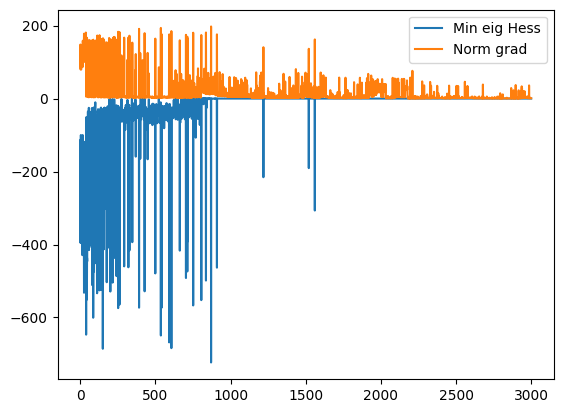

In [16]:
plt.plot(np.min(stats["Hessians"], axis=1), label="Min eig Hess")
plt.plot(stats["gradients"], label="Norm grad")
plt.legend(loc="best")
plt.show()

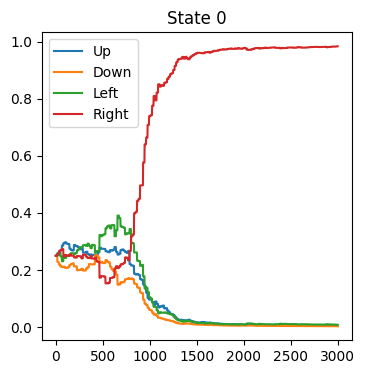

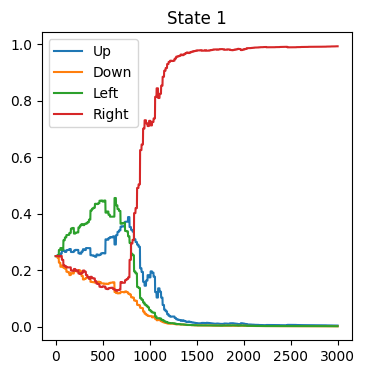

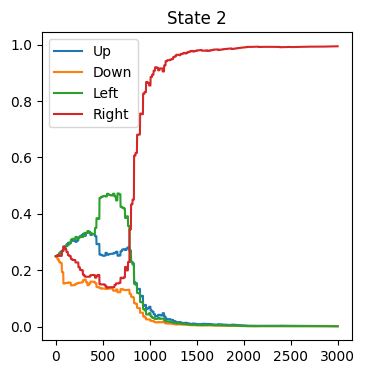

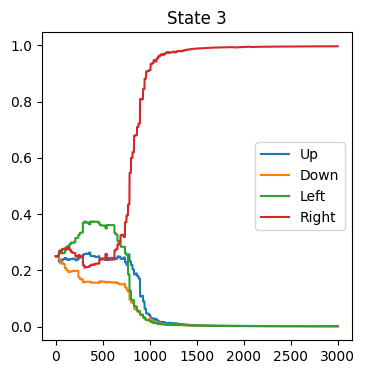

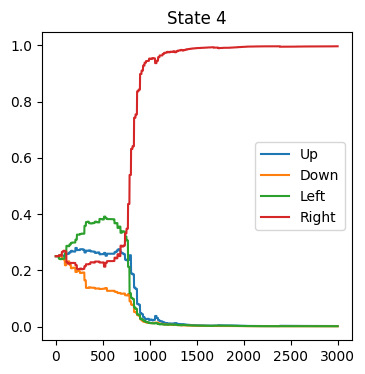

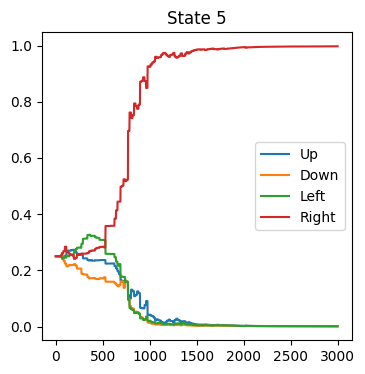

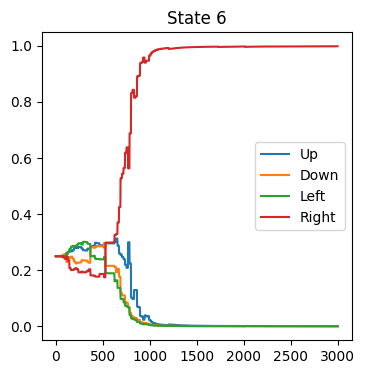

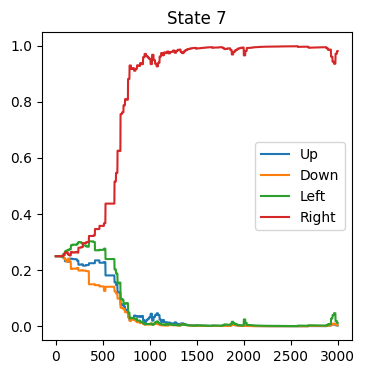

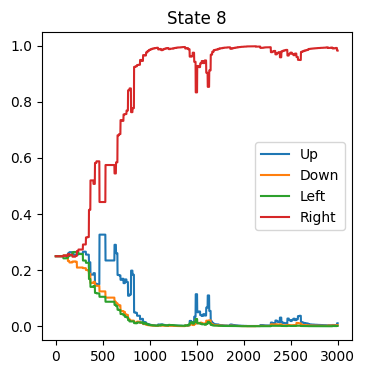

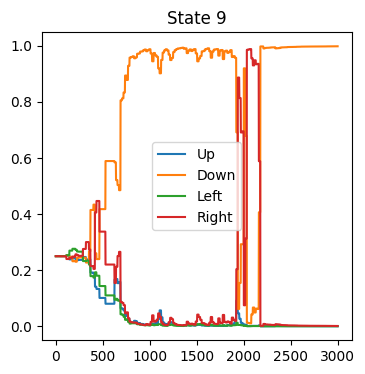

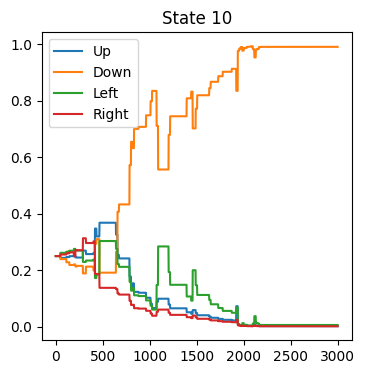

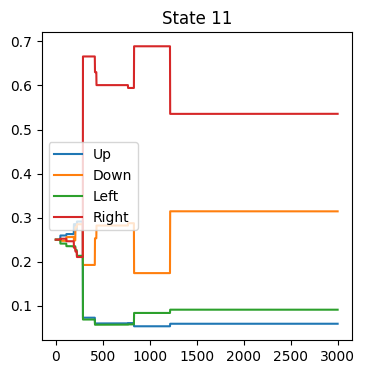

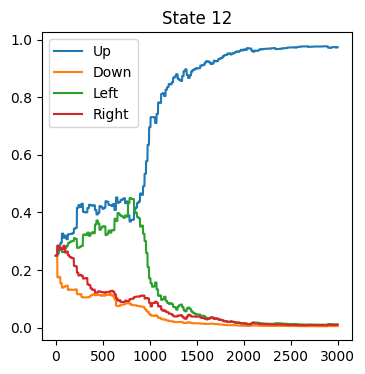

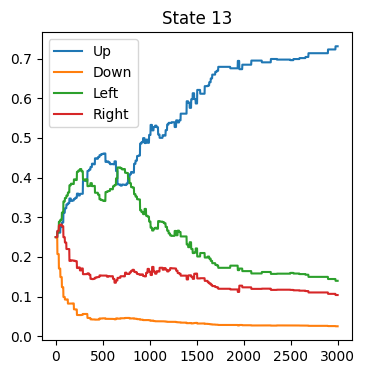

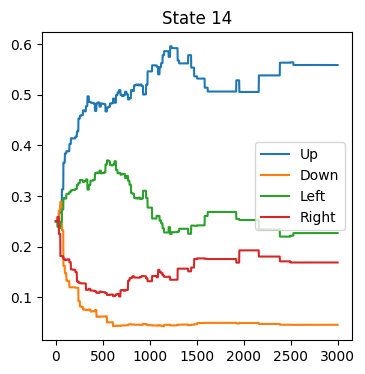

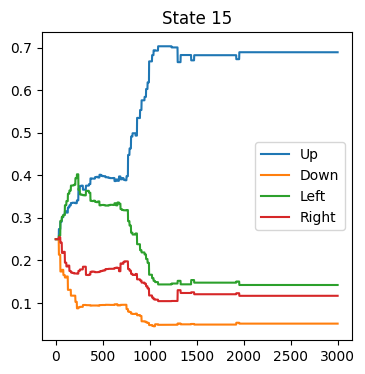

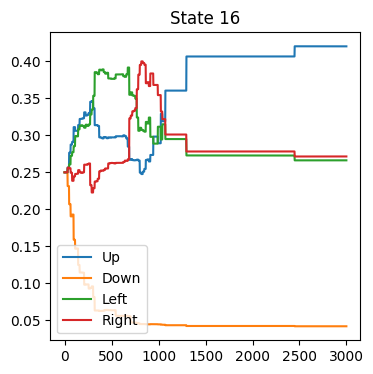

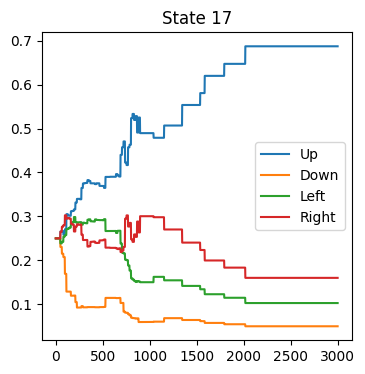

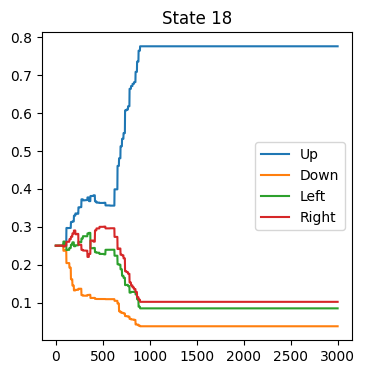

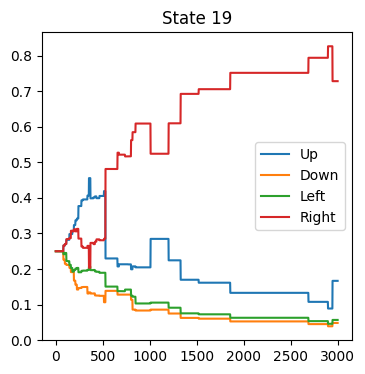

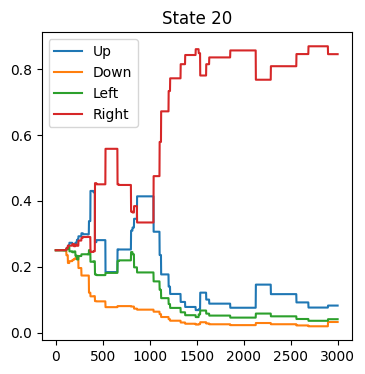

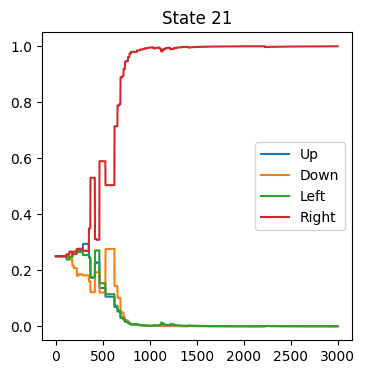

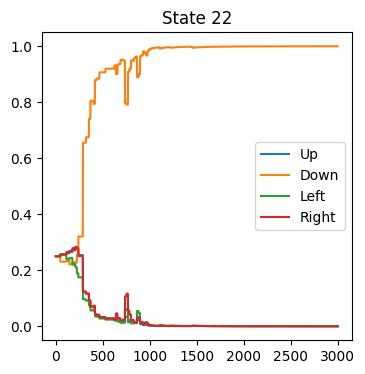

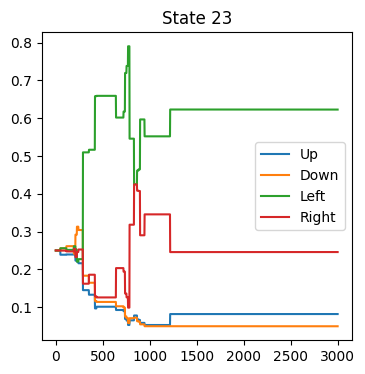

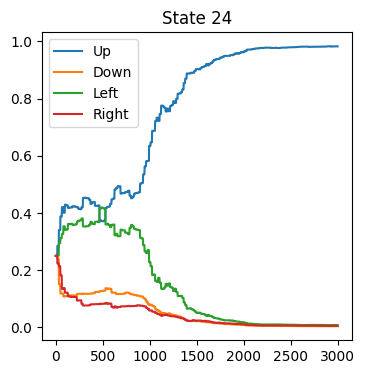

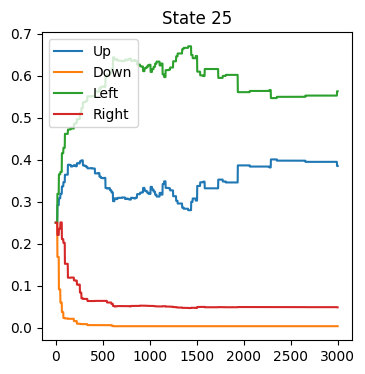

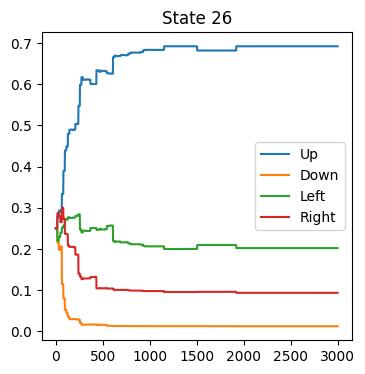

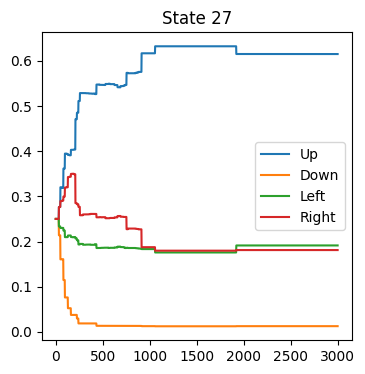

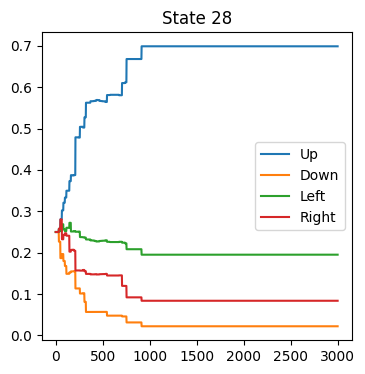

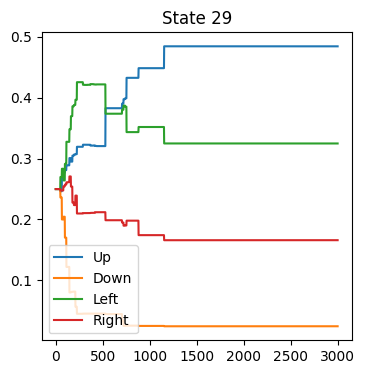

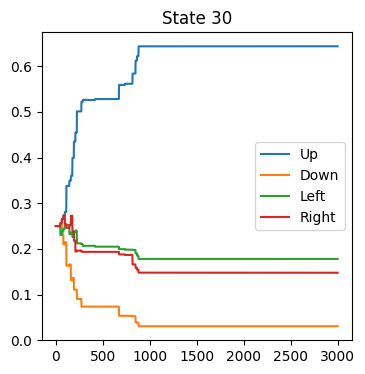

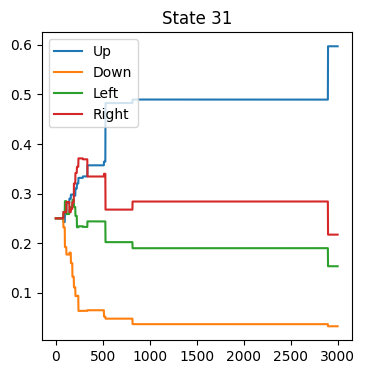

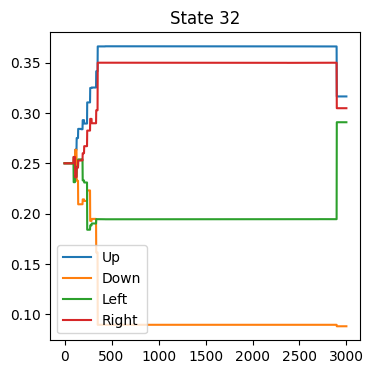

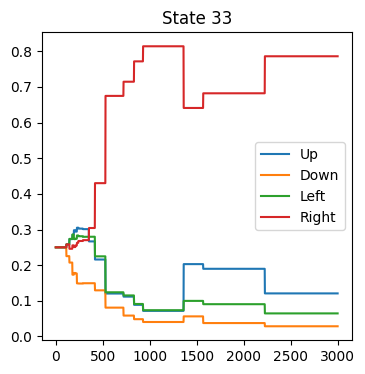

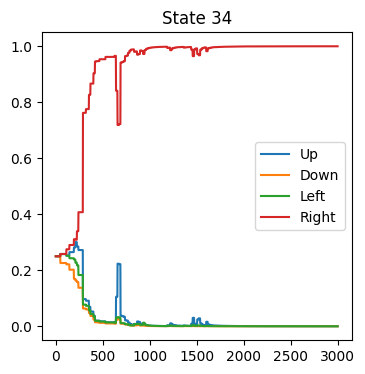

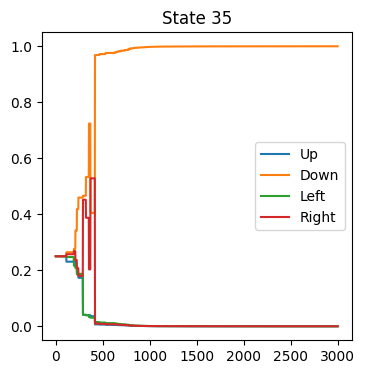

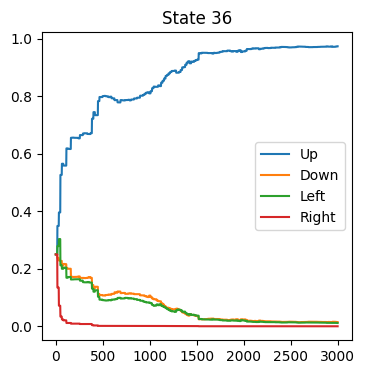

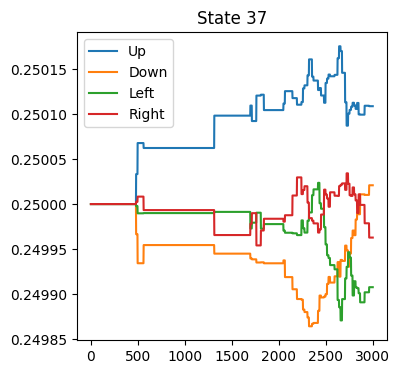

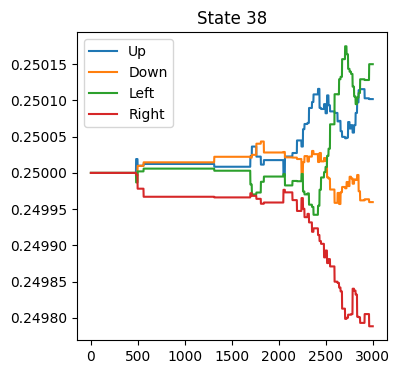

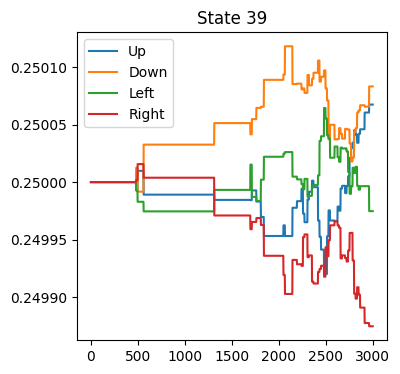

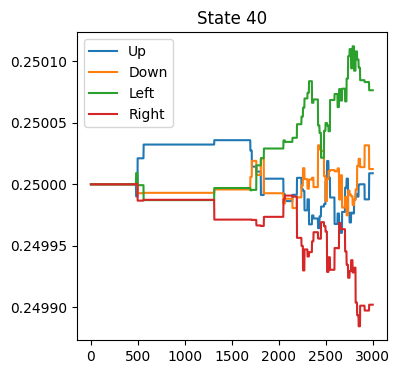

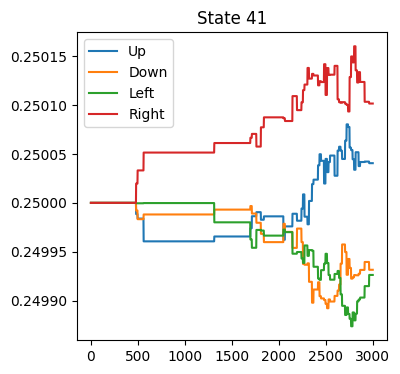

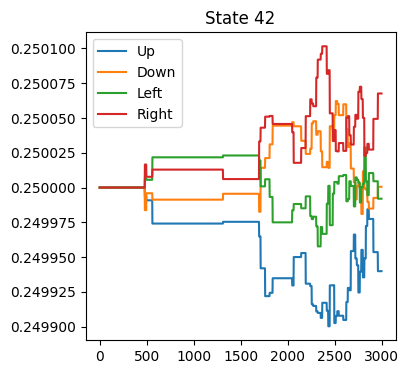

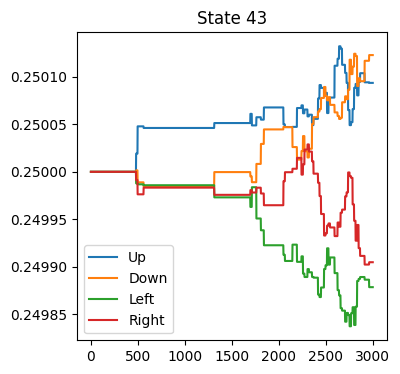

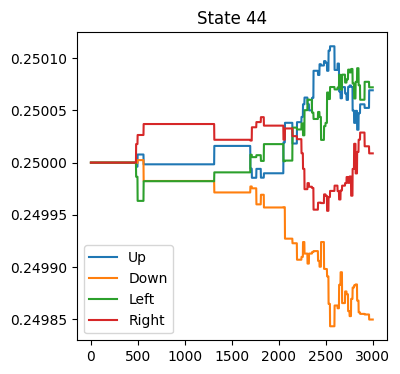

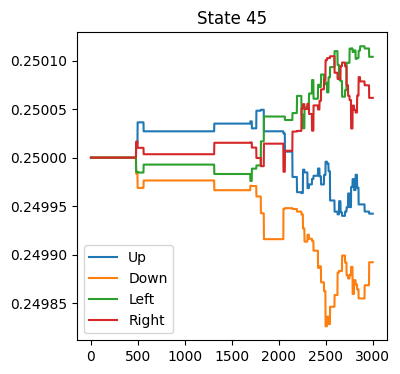

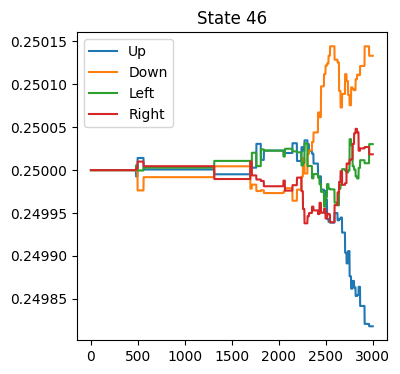

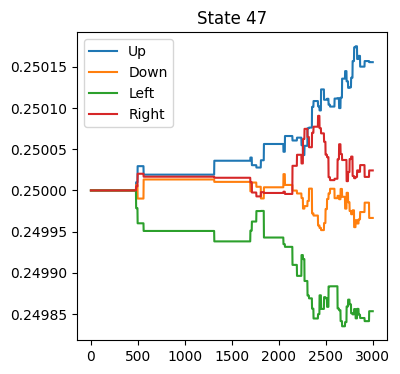

In [17]:
for state in range(48):
    plt.figure(figsize=(4, 4))
    plt.plot([stats["history_probs"][j][state, 0] for j in range(3000)], label="Up")
    plt.plot([stats["history_probs"][j][state, 1] for j in range(3000)], label="Down")
    plt.plot([stats["history_probs"][j][state, 2] for j in range(3000)], label="Left")
    plt.plot([stats["history_probs"][j][state, 3] for j in range(3000)], label="Right")
    plt.legend()
    plt.title(f"State {state}")
    plt.show()